In [1]:
import numpy as np
import matplotlib.pyplot as plt

class NeuralNetwork:
    def __init__(self,data,labels):
        self.z1=data
        self.y1=labels
        self.inputlayersize=2
        self.hiddenlayersize=3
        self.outputlayersize=1
        self.w1=np.random.normal(size=(self.inputlayersize,self.hiddenlayersize))
        self.w2=np.random.normal(size=(self.hiddenlayersize,self.outputlayersize))
        self.z2=0
        self.a2=0
        self.z3=0
        self.yhat=0
        self.meansquareerror=0
        self.dJdw1=0
        self.dJdw2=0
        self.learningrate=0.001
        self.loss=[]
        self.optimisation() 
        
    def forward(self):
        self.z2=np.array(np.dot(self.z1,self.w1))
        self.a2=np.array(self.sigmoid(self.z2))
        self.z3=np.array(np.dot(self.a2,self.w2))
        self.yhat=np.array(self.sigmoid(self.z3))
        return self.yhat
    
    def sigmoid(self,z1):
        return(1/(1+np.exp(-1*z1)))
    
    def sigmoidderivative(self,z1):
        return(np.exp(-1*z1))/(1+np.exp(-1*z1))**2
    
    def costfunction(self):
        self.meansquareerror=np.sum((self.yhat-self.y1)**2)/2
        return self.meansquareerror
    
    def costfunctionderivative(self,z1,u):
        return np.dot(u.T,np.multiply((-1*self.y1-self.yhat),self.sigmoidderivative(z1)))
    
    def back(self):
        self.dJdw1=self.costfunctionderivative(self.z3,self.z1)
        self.dJdw2=self.costfunctionderivative(self.z3,self.a2)
        
    def gradientdescent(self):
        self.w1=self.w1-(self.learningrate * self.dJdw1)
        self.w2=self.w2-(self.learningrate * self.dJdw2)
        
    def optimisation(self):
        for i in range(10):
            self.forward()
            self.back()
            self.gradientdescent()
            h=self.costfunction()
            self.loss.append(h)     

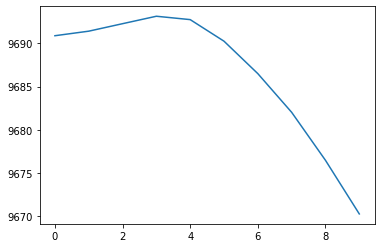

In [2]:
data=np.array([[1,5],[4,2],[5,1]],dtype=np.float32)
labels=np.array([[60],[80],[98]],dtype=np.float32)
get=NeuralNetwork(data=data,labels=labels)
loss_cost=get.loss
plt.plot(range(len(loss_cost)),loss_cost)
plt.show()
